In [1]:
words = open('names.txt', 'r').read().splitlines()


In [2]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  print(chs)
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    print(ch1+" "+ch2)
    b[bigram] = b.get(bigram, 0) + 1
  print(w)

['<S>', 'e', 'm', 'm', 'a', '<E>']
<S> e
e m
m m
m a
a <E>
emma
['<S>', 'o', 'l', 'i', 'v', 'i', 'a', '<E>']
<S> o
o l
l i
i v
v i
i a
a <E>
olivia
['<S>', 'a', 'v', 'a', '<E>']
<S> a
a v
v a
a <E>
ava
['<S>', 'i', 's', 'a', 'b', 'e', 'l', 'l', 'a', '<E>']
<S> i
i s
s a
a b
b e
e l
l l
l a
a <E>
isabella
['<S>', 's', 'o', 'p', 'h', 'i', 'a', '<E>']
<S> s
s o
o p
p h
h i
i a
a <E>
sophia
['<S>', 'c', 'h', 'a', 'r', 'l', 'o', 't', 't', 'e', '<E>']
<S> c
c h
h a
a r
r l
l o
o t
t t
t e
e <E>
charlotte
['<S>', 'm', 'i', 'a', '<E>']
<S> m
m i
i a
a <E>
mia
['<S>', 'a', 'm', 'e', 'l', 'i', 'a', '<E>']
<S> a
a m
m e
e l
l i
i a
a <E>
amelia
['<S>', 'h', 'a', 'r', 'p', 'e', 'r', '<E>']
<S> h
h a
a r
r p
p e
e r
r <E>
harper
['<S>', 'e', 'v', 'e', 'l', 'y', 'n', '<E>']
<S> e
e v
v e
e l
l y
y n
n <E>
evelyn
['<S>', 'a', 'b', 'i', 'g', 'a', 'i', 'l', '<E>']
<S> a
a b
b i
i g
g a
a i
i l
l <E>
abigail
['<S>', 'e', 'm', 'i', 'l', 'y', '<E>']
<S> e
e m
m i
i l
l y
y <E>
emily
['<S>', 'e', 'l', 'i',

In [3]:
sorted(b.items(), key = lambda kv: -kv[1])


[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [4]:
import torch

In [5]:
N = torch.zeros((27, 27), dtype=torch.int32)


In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {  s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [7]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
    

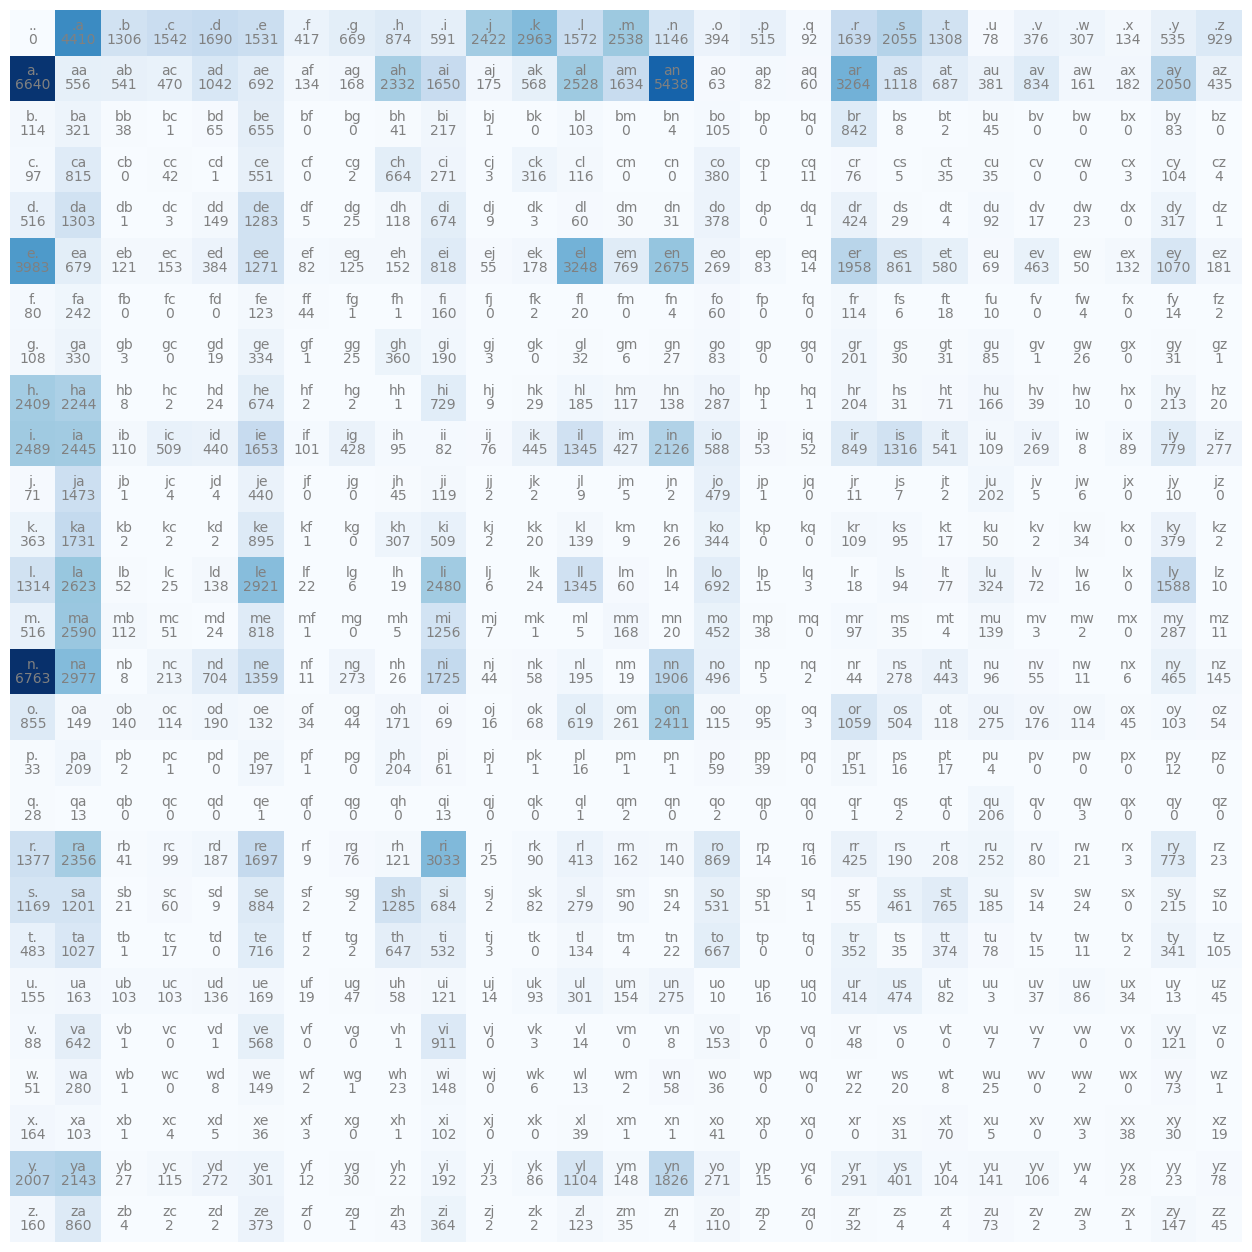

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [9]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [10]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [11]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [12]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [13]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [14]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [15]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [16]:
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [17]:
xs

tensor([ 0,  5, 13, 13,  1])

In [18]:
ys

tensor([ 5, 13, 13,  1,  0])

In [19]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
W = torch.randn((27,27))
xenc @ W


tensor([[ 0.5906, -0.6213,  0.6397,  1.0291,  0.2409,  0.3575,  1.1095, -1.4244,
         -1.1183, -0.2062,  1.0851, -0.9525,  0.7260,  0.3285,  0.6436,  0.5313,
         -0.1168,  1.7142,  0.1754, -0.7699, -1.1623, -1.4576, -1.1848, -0.2440,
         -0.2455,  0.5122,  0.1617],
        [-0.3553,  1.8366, -0.8194, -0.3140, -1.2659, -0.9939, -0.1766,  0.3701,
          2.1107, -0.5165,  0.5367, -1.2709,  0.9692,  0.6772, -0.4773,  1.1922,
         -0.4267,  0.6233, -0.3725,  0.9911,  0.8363, -0.2746,  1.4193,  0.3412,
          0.2684, -0.1332,  0.2880],
        [ 0.2755,  1.2784,  0.0586,  1.7278,  0.9301, -2.3983,  0.6651,  0.2791,
          0.4359,  0.6235, -0.2515,  0.5894,  2.1749,  0.7942,  0.0735, -1.7488,
          0.3186, -0.1010, -0.8865, -0.2197,  0.5070,  0.4768,  0.0207, -0.5303,
          0.5643, -0.5809, -0.7974],
        [ 0.2755,  1.2784,  0.0586,  1.7278,  0.9301, -2.3983,  0.6651,  0.2791,
          0.4359,  0.6235, -0.2515,  0.5894,  2.1749,  0.7942,  0.0735, -1.7488

In [21]:
logits = xenc @ W 
counts = logits.exp()
probs = counts/ counts.sum(1, keepdims=True)
probs

tensor([[0.0476, 0.0142, 0.0500, 0.0738, 0.0336, 0.0377, 0.0800, 0.0063, 0.0086,
         0.0215, 0.0781, 0.0102, 0.0545, 0.0366, 0.0502, 0.0449, 0.0235, 0.1464,
         0.0314, 0.0122, 0.0082, 0.0061, 0.0081, 0.0207, 0.0206, 0.0440, 0.0310],
        [0.0145, 0.1295, 0.0091, 0.0151, 0.0058, 0.0076, 0.0173, 0.0299, 0.1703,
         0.0123, 0.0353, 0.0058, 0.0544, 0.0406, 0.0128, 0.0680, 0.0135, 0.0385,
         0.0142, 0.0556, 0.0476, 0.0157, 0.0853, 0.0290, 0.0270, 0.0181, 0.0275],
        [0.0281, 0.0766, 0.0226, 0.1200, 0.0541, 0.0019, 0.0415, 0.0282, 0.0330,
         0.0398, 0.0166, 0.0385, 0.1877, 0.0472, 0.0230, 0.0037, 0.0293, 0.0193,
         0.0088, 0.0171, 0.0354, 0.0344, 0.0218, 0.0125, 0.0375, 0.0119, 0.0096],
        [0.0281, 0.0766, 0.0226, 0.1200, 0.0541, 0.0019, 0.0415, 0.0282, 0.0330,
         0.0398, 0.0166, 0.0385, 0.1877, 0.0472, 0.0230, 0.0037, 0.0293, 0.0193,
         0.0088, 0.0171, 0.0354, 0.0344, 0.0218, 0.0125, 0.0375, 0.0119, 0.0096],
        [0.0178, 0.2227,

In [22]:
### -------- optmiztion--------------#

In [23]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)


In [24]:
# forward pass
xenc = F.one_hot(xs,num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5),ys].log().mean()

In [25]:
# backgrowrd pass
W.grad =None  # set to zero gradient
loss.backward()

In [26]:
print(loss.item())

3.7693049907684326


In [27]:
W.data += -0.1 * W.grad

In [28]:
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [29]:
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.7686190605163574


In [31]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

juwjdjdjancqydjufhqyywecnw.
.
oiin.
toziasz.
twt.
